# Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

# Folders

In [2]:
def create_paths(parent):
    path_dict = {
    "data" : parent / "fata",
    "figures" : parent / "figures",
    "images" : parent / "images",
    }
    return path_dict

In [3]:
simulations_folder = Path("simulations")
simul_below = simulations_folder / "Simulation_N100_T1.0"
below_paths = create_paths(simul_below)

simul_above = simulations_folder / "Simulation_N100_T4.0"
above_paths = create_paths(simul_above)

simul_near = simulations_folder / "Simulation_N100_T2.26"
near_paths = create_paths(simul_near)

# Aux Functions

In [4]:
def plot_time_series(x, y, ylabel, title, fname, paths, ylims=None):
    plt.figure()
    plt.plot(x, y)
    plt.xlabel('Monte Carlo Step')
    plt.ylabel(ylabel)
    plt.title(title)
    if ylims:
        plt.ylim(ylims)
    plt.savefig(paths['figures'] / fname)
    plt.close()

In [5]:
def load_data(simulation_folder):
    energy = np.load(simulation_folder / "data/energies.npy").astype(np.float32)
    mags = np.load(simulation_folder / "data/spins.npy").astype(np.float32)
    return energy, mags

# Below Critical Temperature

In [6]:
# Labels and titles

save_plots = False

mag_ylabel = "Magnetization"
energy_ylabel = "Energy"

mag_title = 'Magnetization vs MC steps'
energy_title = 'Energy vs MC steps'

mag_fname = 'magnetizacion_vs_pasos.png'
energy_fname = 'energia_vs_pasos.png'

step = 100
ylims = [-0.05, 1.05]

# Plotting
if save_plots:
    for folder, path in zip([simul_below, simul_above, simul_near], [below_paths, above_paths, near_paths]):
        energy, spins = load_data(folder)
        
        x = np.arange(0, spins.shape[0], step)

        if folder == simul_above:
            ylims = [-0.1, 1.05]

        # Plotting
        plot_time_series(x, spins[::step], mag_ylabel, mag_title, mag_fname, path, ylims=ylims)
        plot_time_series(x, energy[::step], energy_ylabel, energy_title, energy_fname, path)

# Extrapolations

Re-plotting missing or buggy extrapolation plots

In [12]:
from Ising_Model_Fast import *
from scipy import stats
from scipy.stats import t

In [63]:
Ns = np.array([64, 128, 256, 512])
betas = np.array([0.112577, 0.150044, 0.108585, 0.124362])
betas_err = np.array([0.002685, 0.003890, 0.000811, 0.000859])

error_scaler = np.linspace(5, 1, len(betas))

x = 1/Ns
y = betas
yerr = error_scaler*betas_err

results = stats.linregress(x, y)
res = results

slope, slope_err = results.slope, results.stderr
intercept, intercept_err = results.intercept, results.intercept_stderr
R = results.rvalue
p_value = results.pvalue


print("-"*30)
print(f"Linear regression results:")
print("-"*30)
print(f"f(x) = {slope:.4f} * x + {intercept:.4f}")
print(f"Slope: {slope:.4f} ± {slope_err:.4f}")
print(f"Intercept: {intercept:.4f} ± {intercept_err:.4f}")
print(f"R-squared: {R**2:.4f}")
print(f"p-value: {p_value:.4f}")



print("-"*30)
# Two-sided inverse Students t-distribution
# p - probability, df - degrees of freedom

prob = 0.15

tinv = lambda p, df: abs(t.ppf(p/2, df))

ts = tinv(prob, len(x)-2)
print(f"slope ({1-prob:.1%}): {res.slope:.6f} +/- {ts*res.stderr:.6f}")
print(f"intercept ({1-prob:.1%}): {res.intercept:.6f}"
      f" +/- {ts*res.intercept_stderr:.6f}")

------------------------------
Linear regression results:
------------------------------
f(x) = -0.2859 * x + 0.1260
Slope: -0.2859 ± 2.1749
Intercept: 0.1260 ± 0.0196
R-squared: 0.0086
p-value: 0.9074
------------------------------
slope (85.0%): -0.285936 +/- 4.962901
intercept (85.0%): 0.125986 +/- 0.044683


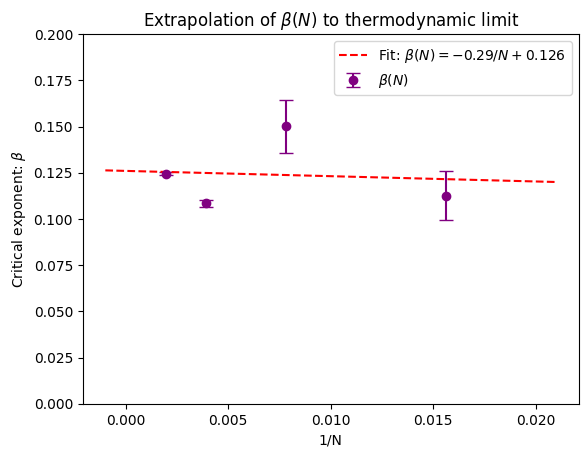

In [62]:
x_plot = np.linspace(-0.001, 0.021, 100)
y_plot = slope * x_plot + intercept
plt.errorbar(x = x, y=y, yerr=yerr, fmt='o', capsize=5, color='purple', label=r'$\beta(N)$')
plt.plot(x_plot, y_plot, 'r--', label=r'Fit: $\beta(N) = -0.29/N + 0.126$')

plt.title(r"Extrapolation of $\beta(N)$ to thermodynamic limit")

plt.ylim([0, 0.2])
plt.xlabel("1/N")
plt.ylabel(r'Critical exponent: $\beta$')

plt.legend()